# Auto MPG Model

### Regression model to predict the miles per gallon(MPG) of a Car.

# Importing Modules and Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path='./original_dataset.csv'
df=pd.read_csv(path,header=None)
df.head()

0  1      2      3     4     5   6  7                          8
0  18.0  8  307.0  130.0  3504  12.0  70  1  chevrolet chevelle malibu
1  15.0  8  350.0  165.0  3693  11.5  70  1          buick skylark 320
2  18.0  8  318.0  150.0  3436  11.0  70  1         plymouth satellite
3  16.0  8  304.0  150.0  3433  12.0  70  1              amc rebel sst
4  17.0  8  302.0  140.0  3449  10.5  70  1                ford torino

In [3]:
#creating list of column name provided to us in project_description.names
columns_name=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

In [4]:
#allocating the name to to columns of df
df.columns=columns_name

In [5]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino

# Understanding the data

<b>Attribute Information:</b>

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)


In [6]:
df.shape

(406, 9)

In [7]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    406.000000  406.000000  406.000000  
mean      15.519704   75.921182    1.568966  
std        2.803359    3.748737    0.797479  
min        8.000000   70.000000    1.000000  
25%       13.700000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

1. Attributes like mpg, horsepower contain NULL values.
2. Data contain object attribute car name. 
3. Displacement and Horsepower may contain some oultiers

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


<b>It returns the datatype of each attribute leaving Car name all other attributes are in either float or integer.

In [9]:
#finding total number of nan values
df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
car name        312
dtype: int64

<b>We will Seperate the continuous and categorical attributes and then remove the mpg from continuous column list 

In [11]:
categorical_col=[col for col in df.columns if df[col].nunique()<15]
print(categorical_col)
numeric_col=[col for col in df.columns if df[col].nunique()>=15 and df[col].dtype!='object']
numeric_col.remove('mpg')
print(numeric_col)

['cylinders', 'model year', 'origin']
['displacement', 'horsepower', 'weight', 'acceleration']


# Data Visualization

### Univariate Analysis

<b>Continuous Variable

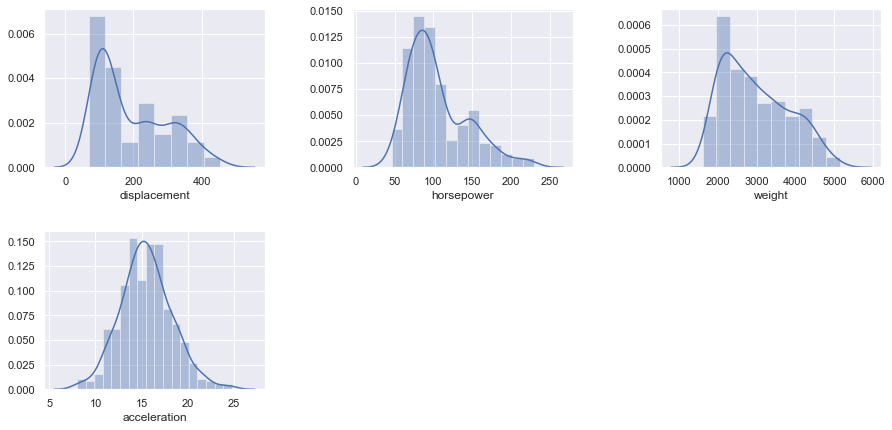

In [12]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(numeric_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col])

1. Acceleration is uniformaly distributed.
2. displacement, horsepower and weight are positively Skew.

<b>Categorical Variable

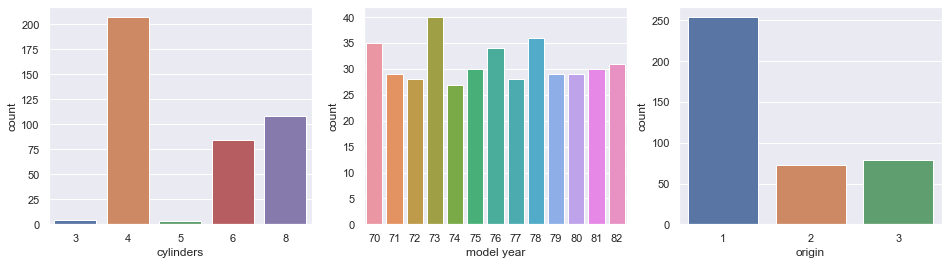

In [13]:
fig=plt.figure(figsize=(16,4))
for i,col in enumerate(categorical_col):
    ax=fig.add_subplot(1,3,i+1)
    sns.countplot(df[col])

1. Large number of car contain 4 Cylinders
2. maximum car are of the model year 73 and are from 1 origin

### Bivariate Analysis

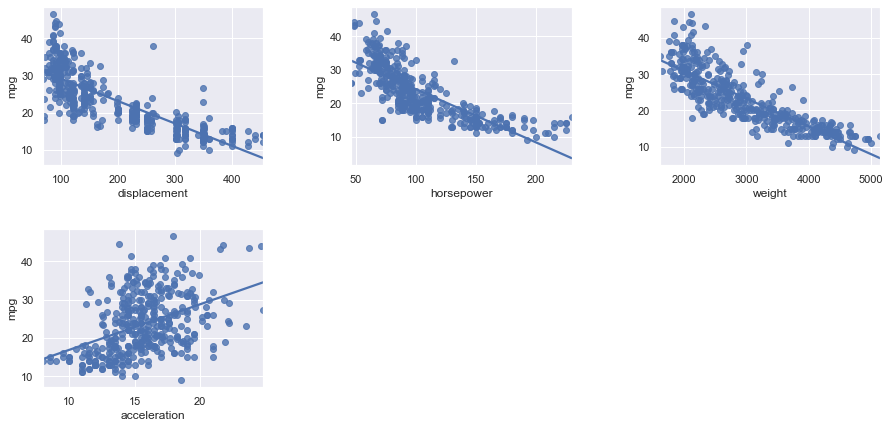

In [14]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(numeric_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.regplot(df[col],df['mpg'],ci=None)

1. Displacement, Horsepower and Weight shows a good Distribution with MPG and are inversily related with MPG as value of any of the three incerases the value of MPG goes down and vise-versa as expected these cases in terms of car MPG
2. Acceleration has circular type distribution with mpg as acceleration is uniformally distributed as we have seen in univariate analysis and is directly related with MPG as the Acceleration increases the MPG also Increases.

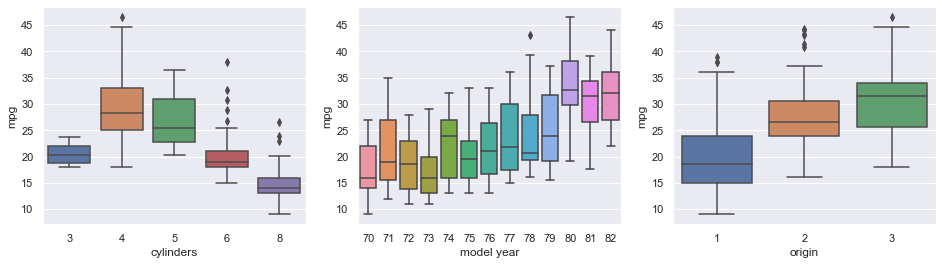

In [15]:
fig=plt.figure(figsize=(16,4))
for i,col in enumerate(categorical_col):
    ax=fig.add_subplot(1,3,i+1)
    sns.boxplot(df[col],df['mpg'])

1. Car with four Cylinders have highest MPG and with 8 cylinders have the lowest MPG
2. Cars of model year 80s and car with origin 3 have high MPG

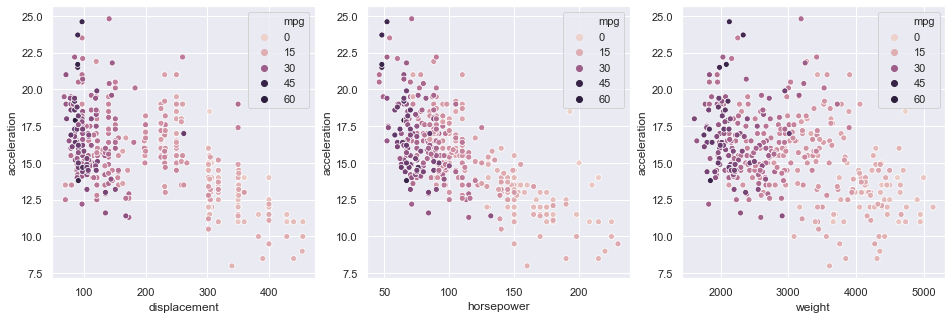

In [16]:
fig=plt.figure(figsize=(16,5))
for i,col in enumerate(['displacement','horsepower','weight']):
    ax=fig.add_subplot(1,3,i+1)
    sns.scatterplot(col,'acceleration',data=df,hue='mpg')

1. The above plots clearly displays that acceleration in range 12 to 22 with low value of displacement, horsepower, weight gives the highest mpg and as their value increases the MPG goes down.

# Feature Engineering

### Data Cleaning

<b>Removing Outliers

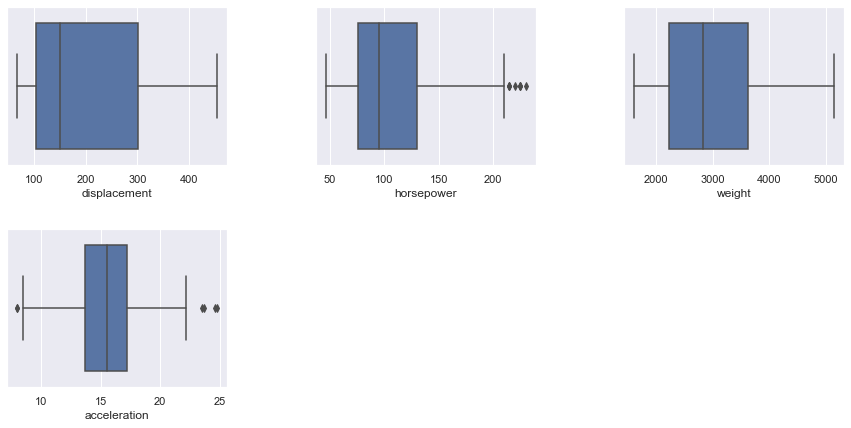

In [17]:
fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(numeric_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(df[col])

the boxplot display that horsepower and acceleration contain some outliers we will check using interquartile range of the continuous attributes for outliers

In [18]:
from scipy.stats import iqr

In [19]:
for col in numeric_col:
    temp_df=df[(df[col]>df[col].quantile(0.75)+1.5*iqr(df[col])) | (df[col]<df[col].quantile(0.25)-1.5*iqr(df[col]))]
    if temp_df.shape[0]!=0:
        print(col)
        display(temp_df)

acceleration


mpg  cylinders  displacement  horsepower  weight  acceleration  \
16   14.0          8         340.0       160.0    3609           8.0   
17    NaN          8         302.0       140.0    3353           8.0   
66   23.0          4          97.0        54.0    2254          23.5   
306  27.2          4         141.0        71.0    3190          24.8   
333  43.4          4          90.0        48.0    2335          23.7   
402  44.0          4          97.0        52.0    2130          24.6   

     model year  origin               car name  
16           70       1     plymouth 'cuda 340  
17           70       1  ford mustang boss 302  
66           72       2      volkswagen type 3  
306          79       2            peugeot 504  
333          80       2     vw dasher (diesel)  
402          82       2              vw pickup

Above result shows that only acceleration contain outliers so we will remove them as they are less in number

In [20]:
df.drop(df[(df[col]>df[col].quantile(0.75)+1.5*iqr(df[col])) | (df[col]<df[col].quantile(0.25)-1.5*iqr(df[col]))].index,inplace=True)

<b> Missing Values

In [21]:
df.isna().sum()

mpg             7
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

we will drop the rows or records with mpg containing NAN values as mpg is the target variabe and we cann't train our model on assumed values and we will fill the NAN values of horsepower with the median of horsepower

In [22]:
df.drop(df[df.mpg.isnull()==True].index,inplace=True)

In [23]:
df.horsepower.fillna(df.horsepower.median(),inplace=True)

In [24]:
df.reset_index(drop=True,inplace=True)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(393, 9)

In [27]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<b> Finding correlation Among Attributes

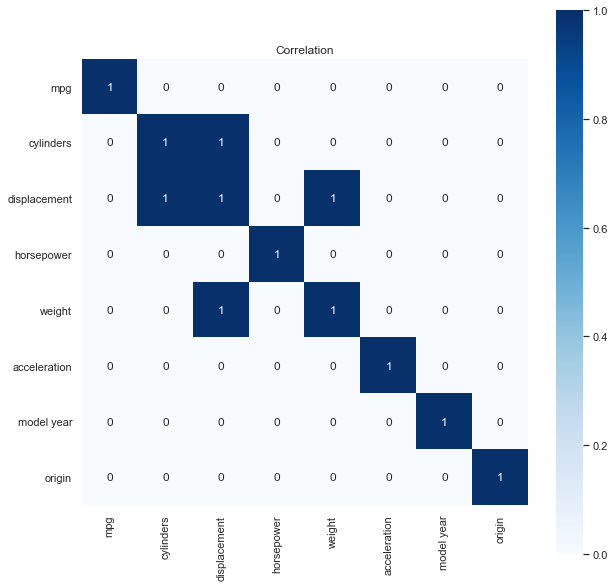

In [28]:
corr=df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr > 0.90, annot=True, square=True,cmap='Blues')

the above heatmap shows that
1. cylinder and displacement 
2. displacement and weight
are highly correlated

In [29]:
corr['mpg'].sort_values(ascending=False)

mpg             1.000000
model year      0.572373
origin          0.565765
acceleration    0.398965
horsepower     -0.772543
cylinders      -0.778698
displacement   -0.807370
weight         -0.837566
Name: mpg, dtype: float64

In case of cylinder and displacement cylinder is having less value of correlation and in case of weight and displacement, weight is having high correlation as compaired to displacement so if we will remove cylinder from first case and displacement from second case we will loose two attributes so we will remove the displacement which is common for both

In [30]:
df.drop('displacement',axis=1,inplace=True)

<b> Creating Feature

In [31]:
def fun(row):
    return row.split()[0]

In [32]:
df['company']=df['car name'].apply(fun)

In [33]:
df.company.value_counts().sort_index()

amc              28
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             51
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           7
plymouth         30
pontiac          16
renault           5
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       14
volvo             6
vw                4
Name: company, dtype: int64

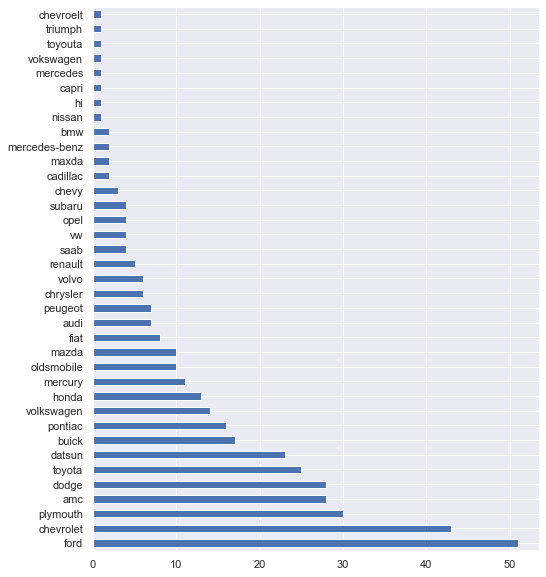

In [34]:
fig,ax=plt.subplots(figsize=(8,10))
df.company.value_counts().plot(kind='barh')

In [35]:
df.replace('chevroelt','chevrolet',inplace=True)
df.replace('maxda','mazda',inplace=True)
df.replace('mercedes-benz','mercedes',inplace=True)
df.replace('toyouta','toyota',inplace=True)
df.replace(['vokswagen','vw'],'volkswagen',inplace=True)
df.replace(['fiat','audi','peugeot','volvo','chrysler','renault','subaru','saab','opel','chevy','mercedes','bmw','cadillac','nissan','capri','hi','triumph'],'other',inplace=True)

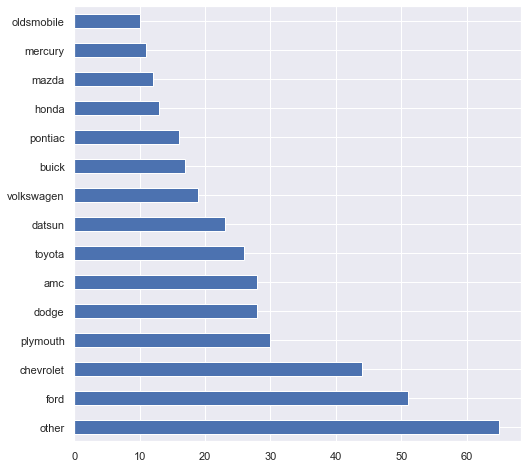

In [36]:
fig,ax=plt.subplots(figsize=(8,8))
df.company.value_counts().plot(kind='barh')

In [37]:
df.drop('car name',axis=1,inplace=True)

In [38]:
company_dummy=pd.get_dummies(df.company,drop_first=True)

In [39]:
df=pd.concat([df,company_dummy],axis=1)

In [40]:
df.drop('company',axis=1,inplace=True)

In [41]:
df.head()

mpg  cylinders  horsepower  weight  acceleration  model year  origin  \
0  18.0          8       130.0    3504          12.0          70       1   
1  15.0          8       165.0    3693          11.5          70       1   
2  18.0          8       150.0    3436          11.0          70       1   
3  16.0          8       150.0    3433          12.0          70       1   
4  17.0          8       140.0    3449          10.5          70       1   

   buick  chevrolet  datsun  ...  ford  honda  mazda  mercury  oldsmobile  \
0      0          1       0  ...     0      0      0        0           0   
1      1          0       0  ...     0      0      0        0           0   
2      0          0       0  ...     0      0      0        0           0   
3      0          0       0  ...     0      0      0        0           0   
4      0          0       0  ...     1      0      0        0           0   

   other  plymouth  pontiac  toyota  volkswagen  
0      0         0        0       0           0  
1      0         0        0       0           0  
2      0         1        0       0           0  
3      0         0        0       0           0  
4      0         0        0       0           0  

[5 rows x 21 columns]

In [42]:
df.shape

(393, 21)

<b>Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
scaled_df=scaler.fit_transform(df)

In [46]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

In [47]:
scaled_df.head()

mpg  cylinders  horsepower    weight  acceleration  model year  \
0 -0.704492   1.493643    0.666683  0.625198     -1.344258   -1.632225   
1 -1.093859   1.493643    1.588036  0.848071     -1.536295   -1.632225   
2 -0.704492   1.493643    1.193170  0.545012     -1.728331   -1.632225   
3 -0.964070   1.493643    1.193170  0.541474     -1.344258   -1.632225   
4 -0.834281   1.493643    0.929927  0.560341     -1.920368   -1.632225   

     origin     buick  chevrolet    datsun  ...      ford     honda     mazda  \
0 -0.708527 -0.212633   2.816348 -0.249323  ... -0.386164 -0.184961 -0.177471   
1 -0.708527  4.702940  -0.355070 -0.249323  ... -0.386164 -0.184961 -0.177471   
2 -0.708527 -0.212633  -0.355070 -0.249323  ... -0.386164 -0.184961 -0.177471   
3 -0.708527 -0.212633  -0.355070 -0.249323  ... -0.386164 -0.184961 -0.177471   
4 -0.708527 -0.212633  -0.355070 -0.249323  ...  2.589572 -0.184961 -0.177471   

    mercury  oldsmobile     other  plymouth  pontiac    toyota  volkswagen  
0 -0.169693   -0.161585 -0.445164 -0.287480 -0.20601 -0.266167   -0.225393  
1 -0.169693   -0.161585 -0.445164 -0.287480 -0.20601 -0.266167   -0.225393  
2 -0.169693   -0.161585 -0.445164  3.478505 -0.20601 -0.266167   -0.225393  
3 -0.169693   -0.161585 -0.445164 -0.287480 -0.20601 -0.266167   -0.225393  
4 -0.169693   -0.161585 -0.445164 -0.287480 -0.20601 -0.266167   -0.225393  

[5 rows x 21 columns]

# Model Development

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [49]:
x=scaled_df.drop('mpg',axis=1)
y=scaled_df.mpg

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

## Linear Regression

In [51]:
lm=LinearRegression()

In [52]:
lm.fit(x_train,y_train)

LinearRegression()

In [53]:
yhat=lm.predict(x_test)

In [54]:
mean_squared_error(y_test,yhat)

0.1764742397827893

In [55]:
lm.score(x_test,y_test)

0.8313833993698124

In [56]:
cross_val_score(lm,x,y).mean()

0.5906438717928257

Text(0.5, 0, 'MPG')

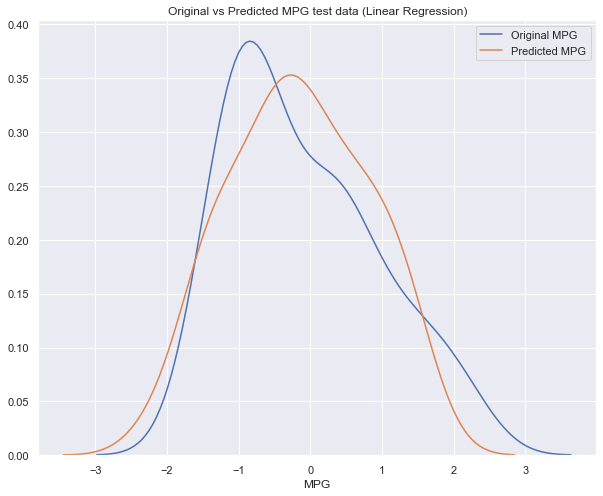

In [57]:
plt.figure(figsize=(10,8))
sns.distplot(y_test,hist=False,label="Original MPG")
sns.distplot(yhat,hist=False,label="Predicted MPG")
plt.title("Original vs Predicted MPG test data (Linear Regression)")
plt.xlabel("MPG")

## Polynomial Regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures

Let's explore some of the feature for polynomal fit

In [59]:
x=df['weight']
y=df['mpg']
f=np.polyfit(x,y,2)
p=np.poly1d(f)
p

poly1d([ 1.71234507e-06, -1.85544211e-02,  6.22307769e+01])

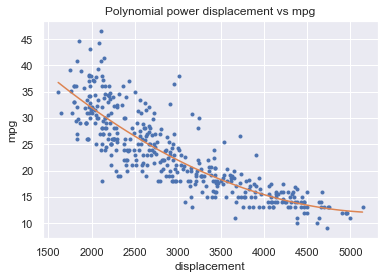

In [60]:
x_new=np.linspace(df['weight'].min(),df['weight'].max(),100)
#polynomial values of degree 2 of the new values
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.title("Polynomial power displacement vs mpg")
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.show()

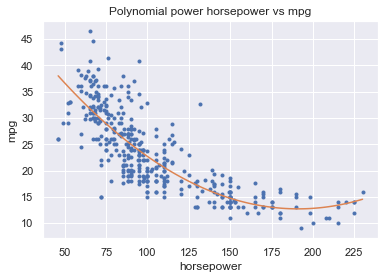

In [61]:
x=df['horsepower']
y=df['mpg']
f=np.polyfit(x,y,2)
p=np.poly1d(f)
x_new=np.linspace(df['horsepower'].max(),df['horsepower'].min(),100)
y_new=p(x_new)
plt.plot(x,y,'.',x_new,y_new,'-')
plt.title("Polynomial power horsepower vs mpg")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

the above graphs shows that polynomial line fit more accuratly in the data so we will apply the polynomial regression of degree 2 and chack weather it is better then linear regression

In [62]:
X=df.drop('mpg',axis=1)
Y=df.mpg

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [64]:
polynomial_features=PolynomialFeatures(degree=2)

In [65]:
X_train=polynomial_features.fit_transform(X_train)
X_test=polynomial_features.fit_transform(X_test)

In [66]:
lm_poly=LinearRegression()

In [67]:
lm_poly.fit(X_train,Y_train)

LinearRegression()

In [68]:
yhat_poly=lm_poly.predict(X_test)

In [69]:
mean_squared_error(Y_test,yhat_poly)

6.887827289424193

In [70]:
lm_poly.score(X_test,Y_test)

0.8317803894705068

In [71]:
cross_val_score(lm_poly,polynomial_features.fit_transform(X),Y).mean()

0.4403178468015085

Text(0.5, 0, 'MPG')

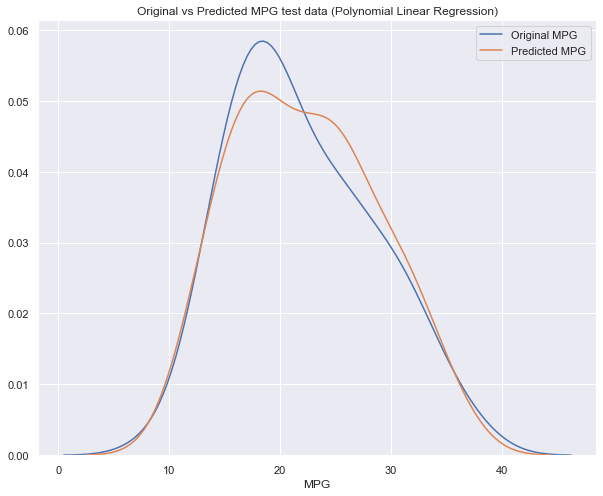

In [72]:
plt.figure(figsize=(10,8))
sns.distplot(Y_test,hist=False,label="Original MPG")
sns.distplot(yhat_poly,hist=False,label="Predicted MPG")
plt.title("Original vs Predicted MPG test data (Polynomial Linear Regression)")
plt.xlabel("MPG")

# Conclusion

After looking at the scores like accuracy score ,mean squared error and cross validation score we can conclude that polynomial regression has a little edge on accuracy score but cross validation score and mean squared score of linear regression are much better then that of polynomial regression so we conclude that linear regression fit the data much better as compair to polynomial regression 